<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.119198  30.380644  80.249522  0.081810  171.831174   
      1.0    49.062167  82.267298  54.386566  0.139430  195.855462   
      2.0    48.653011  92.218896  33.070367  0.219671  184.161946   
      3.0    42.315509  29.375512  52.525370 -0.084838  134.131552   
      4.0    23.661843  37.726986  39.249263 -0.335472  110.302620   
...                ...        ...        ...       ...         ...   
999.0 25.0   70.264803  28.702750  71.004383 -0.085137  179.886798   
      26.0   60.672015  65.105594  28.925354  0.199179  164.902143   
      27.0   99.509017  94.501909  61.895670 -0.220115  265.686482   
      28.0   76.501871  75.841690  67.480194 -0.053051  229.770704   
      29.0   67.949753  45.345177  41.458335  0.080636  164.833900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    171.746428  0.084746  
      1.0    195.731315  0.124147  
      2.0    183.956721  0.205225  
      3.0    134.197760 -0.066208  
      4.0    110.603645 -0.301025  
...                 ...       ...  
999.0 25.0   180.055250 -0.168451  
      26.0   164.706375  0.195767  
      27.0   265.950368 -0.263886  
      28.0   229.851324 -0.080620  
      29.0   164.801569  0.032331  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.119198  30.380644  80.249522  0.081810  171.831174   
      1.0    49.062167  82.267298  54.386566  0.139430  195.855462   
      2.0    48.653011  92.218896  33.070367  0.219671  184.161946   
      3.0    42.315509  29.375512  52.525370 -0.084838  134.131552   
      4.0    23.661843  37.726986  39.249263 -0.335472  110.302620   
...                ...        ...        ...       ...         ...   
999.0 25.0   70.264803  28.702750  71.004383 -0.085137  179.886798   
      26.0   60.672015  65.105594  28.925354  0.199179  164.902143   
      27.0   99.509017  94.501909  61.895670 -0.220115  265.686482   
      28.0   76.501871  75.841690  67.480194 -0.053051  229.770704   
      29.0   67.949753  45.345177  41.458335  0.080636  164.833900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    171.746428  0.084746  
      1.0    195.731315  0.124147  
      2.0    183.956721  0.205225  
      3.0    134.197760 -0.066208  
      4.0    110.603645 -0.301025  
...                 ...       ...  
999.0 25.0   180.055250 -0.168451  
      26.0   164.706375  0.195767  
      27.0   265.950368 -0.263886  
      28.0   229.851324 -0.080620  
      29.0   164.801569  0.032331  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.119198  30.380644  80.249522  0.081810  171.831174   
      1.0    49.062167  82.267298  54.386566  0.139430  195.855462   
      2.0    48.653011  92.218896  33.070367  0.219671  184.161946   
      3.0    42.315509  29.375512  52.525370 -0.084838  134.131552   
      4.0    23.661843  37.726986  39.249263 -0.335472  110.302620   
...                ...        ...        ...       ...         ...   
999.0 25.0   70.264803  28.702750  71.004383 -0.085137  179.886798   
      26.0   60.672015  65.105594  28.925354  0.199179  164.902143   
      27.0   99.509017  94.501909  61.895670 -0.220115  265.686482   
      28.0   76.501871  75.841690  67.480194 -0.053051  229.770704   
      29.0   67.949753  45.345177  41.458335  0.080636  164.833900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    171.746428  0.084746  
      1.0    195.731315  0.124147  
      2.0    183.956721  0.205225  
      3.0    134.197760 -0.066208  
      4.0    110.603645 -0.301025  
...                 ...       ...  
999.0 25.0   180.055250 -0.168451  
      26.0   164.706375  0.195767  
      27.0   265.950368 -0.263886  
      28.0   229.851324 -0.080620  
      29.0   164.801569  0.032331  

[30000 rows x 7 columns]

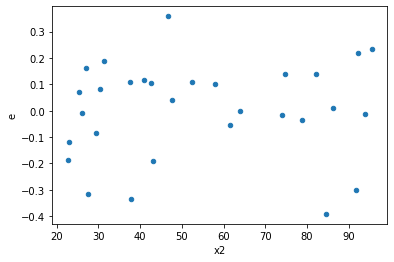

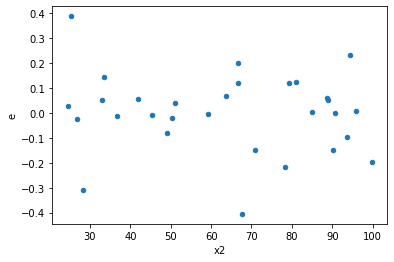

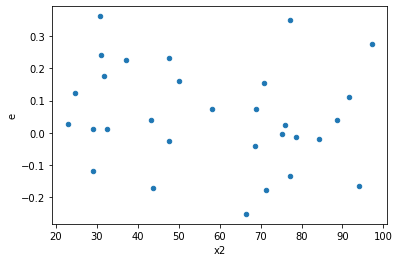

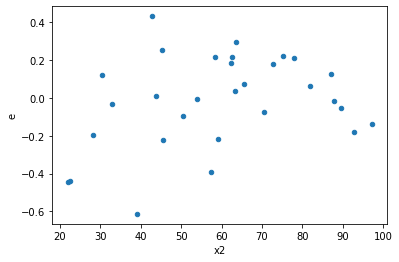

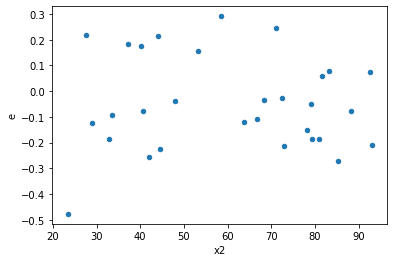

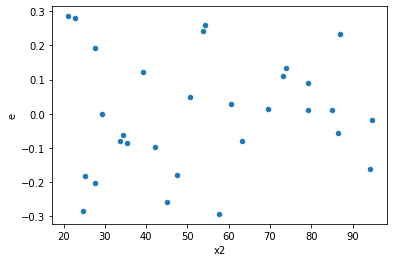

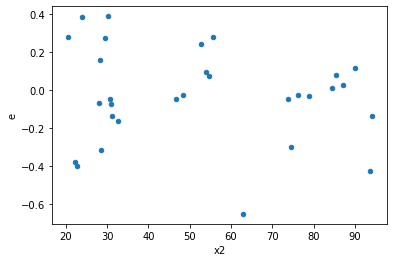

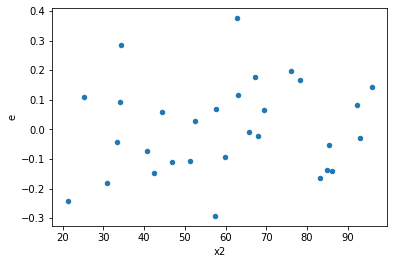

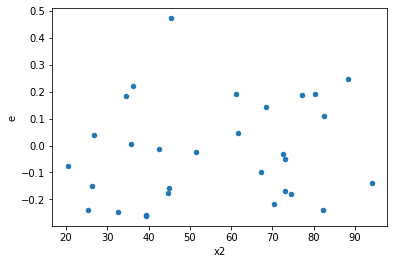

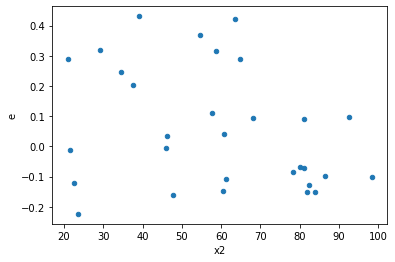

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,0.17660573797260073,0.4778504686190685,0.019622859774733416,0.05309449651322983,2.705747129763156,0.15425655074281686,0.9228717246285916,0.07712827537140843,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.17438008621124626,0.2941947745436178,0.01937556513458292,0.0326883082826242,1.6870892825871555,0.4479123128268099,0.7760438435865951,0.22395615641340494,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.157369723018881,0.21498041080236482,0.017485524779875666,0.02388671231137387,1.3660849538165087,0.6496567144339902,0.6751716427830049,0.3248283572169951,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.17338600179085195,0.25942292845146964,0.01926511131009466,0.02882476982794107,1.4962161060983477,0.5578950769990951,0.7210524615004524,0.27894753849954756,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,0.2268270688474175,0.7868848009349606,0.025203007649713054,0.08743164454832895,3.4690956636409385,0.07798743224069127,0.9610062838796544,0.038993716120345634,Reject001=1 : Homoscedasticity
17.0,9.0,9.0,0.22053615738014057,0.33516525769525835,0.024504017486682284,0.03724058418836204,1.51977463322502,0.542833007337608,0.728583496331196,0.271416503668804,Reject001=1 : Homoscedasticity
18.0,9.0,9.0,0.22234413990783694,0.2643213891315705,0.024704904434204103,0.029369043236841166,1.1887940435090099,0.8009140912702699,0.599542954364865,0.40045704563513496,Reject001=1 : Homoscedasticity
22.0,9.0,9.0,0.08140541583068193,0.0907100397454264,0.009045046203409103,0.010078893305047376,1.1142998143280478,0.874564360017343,0.5627178199913285,0.4372821800086715,Reject001=1 : Homoscedasticity
23.0,9.0,9.0,0.18573024472125868,0.2315731084150401,0.02063669385791763,0.0257303453794489,1.2468249786812147,0.7478031200865505,0.6260984399567248,0.37390156004327524,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.17660573797260073,0.4778504686190685,0.019622859774733416,0.05309449651322983,2.705747129763156,0.15425655074281686,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.3708617548650527,0.2196462466272504,0.04120686165167252,0.024405138514138933,0.5922590931684886,0.44722021110561455,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.17438008621124626,0.2941947745436178,0.01937556513458292,0.0326883082826242,1.6870892825871555,0.4479123128268099,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.8129310896205071,0.22134122934876316,0.09032567662450079,0.02459346992764035,0.27227551286307644,0.06597297415531601,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.157369723018881,0.21498041080236482,0.017485524779875666,0.02388671231137387,1.3660849538165087,0.6496567144339902,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.29920733051116966,0.2066706572497087,0.033245258945685516,0.022963406361078745,0.690727252225505,0.5903303374432457,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.8933570152753331,0.3285407965460897,0.09926189058614812,0.03650453294956552,0.3677597991938679,0.15229407123368474,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.3084091321177497,0.15708254732227148,0.03426768134641663,0.017453616369141275,0.5093316992387171,0.32932322790110385,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.17338600179085195,0.25942292845146964,0.01926511131009466,0.02882476982794107,1.4962161060983477,0.5578950769990951,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      971
Reject001=0 : Heteroscedasticity     29
Name: Result_test, dtype: int64